In [16]:
import pandas as pd

In [2]:
# pip install --upgrade scikit-lear

In [17]:
df=pd.read_csv("C:\\Users\\HP\\ML Mock\\Datasets\\sales_data_sample.csv",encoding='iso-8859-1')

In [18]:
df.shape

(2823, 25)

In [19]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [20]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [21]:
# Select the relevant features for clustering
selected_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
X = df[selected_features]

In [22]:
X.head()

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
# X_scaled = scaler.fit_transform(X)

In [11]:
# X_scaled

In [25]:
from sklearn.cluster import KMeans

In [26]:
X_scaled= pd.DataFrame(X_scaled, index = X.index, columns=X.columns)
# X_scaled.head()

In [14]:
# X_scaled.isnull().sum()

In [32]:
wcss = []
for i in range(1, 11):
    print(i)
    kmeans = KMeans(n_clusters=i,random_state=42,n_init='auto')
    kmeans=kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Create a simple dataset
dummy_data = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
X_scaled = scaler.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X_scaled)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

# wcss = []
# list = [1,2,3,4,5]
# for i in range(1,len(list)):
#     print(i)
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(dummy_data)
#     wcss.append(kmeans.inertia_)

In [33]:
import matplotlib.pyplot as plt

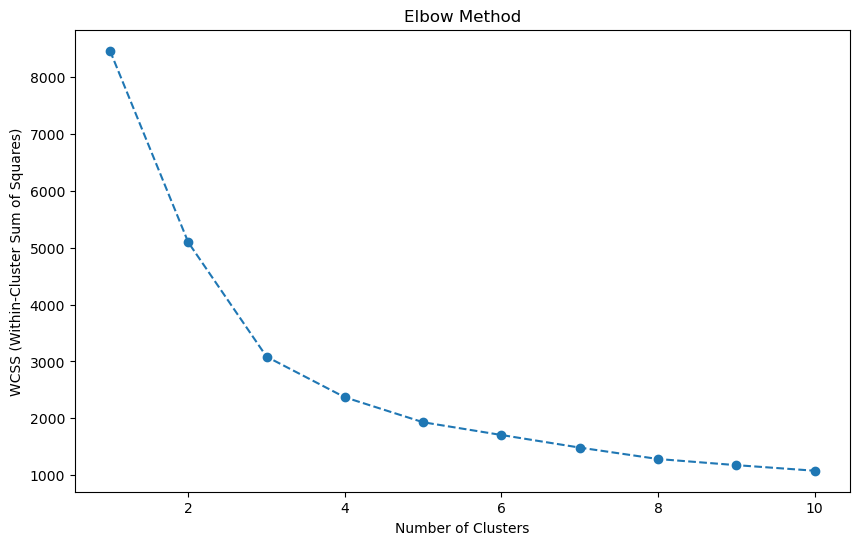

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [38]:
optimal_num_clusters = 3

In [39]:
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
X['cluster'] = kmeans.fit_predict(X)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_2896\3837348506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X)


In [40]:
X

,QUANTITYORDERED,PRICEEACH,SALES,cluster
0,30,95.70,2871.00,1
1,34,81.35,2765.90,1
2,41,94.74,3884.34,0
3,45,83.26,3746.70,0
4,49,100.00,5205.27,0
...,...,...,...,...
2818,20,100.00,2244.40,1
2819,29,100.00,3978.51,0
2820,43,100.00,5417.57,0
2821,34,62.24,2116.16,1


AttributeError: 'PathCollection' object has no property 'z'

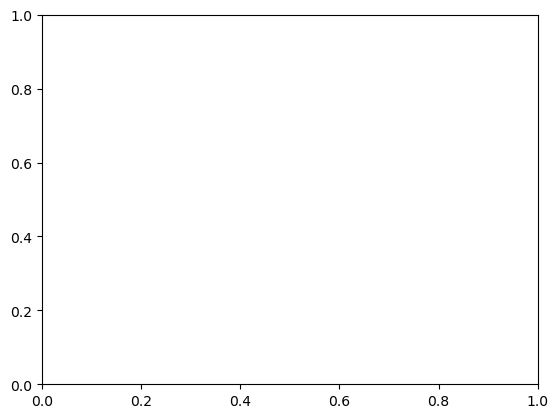

In [42]:
plt.scatter(x=X['QUANTITYORDERED'],y=X['PRICEEACH'],z=X['SALES'],c=X['cluster'])

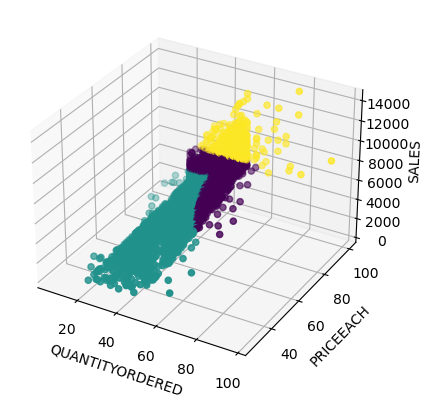

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Sample data (replace this with your own data)
x=X['QUANTITYORDERED']
y=X['PRICEEACH']
z=X['SALES']
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(x, y, z, c=X['cluster'], marker='o')  # c='r' sets the color to red, and marker='o' sets the marker style to circles

# Set axis labels
ax.set_xlabel('QUANTITYORDERED')
ax.set_ylabel('PRICEEACH')
ax.set_zlabel('SALES')

# Show the plot
plt.show()
